<a href="https://colab.research.google.com/github/RanudeeFernando/CM2604_ML_CW/blob/main/notebooks/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Client Subscription to Term Deposits Using Bank Marketing Data

**Description of Dataset**

The dataset used in this study was taken from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/222/bank%2Bmarketing) and it contains information related to a direct marketing campaign conducted by a Portuguese banking institution.

The goal of this study is to predict whether a client will subscribe to a long-term deposit (target variable: y).




## Explore Dataset

In [57]:
import pandas as pd

# Define file path to dataset
file_path = "https://raw.githubusercontent.com/RanudeeFernando/CM2604_ML_CW/refs/heads/main/data/bank-full.csv?token=GHSAT0AAAAAACZXMC4ZJM3KDYL2E2QQGO5EZ3SK6YA"

# Load the dataset
df = pd.read_csv(file_path, sep=';')


In [45]:
# View first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [46]:
# Check shape of dataset
print("Shape of dataset:")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Shape of dataset:
Number of Rows: 45211
Number of Columns: 17


In [47]:
# Display information about dataset
print("Dataset information:")
df.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [48]:
# Display summary statistics for numerical columns
print("Statistical summary of numerical columns:")
display(df.describe())

Statistical summary of numerical columns:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Strip spaces from all categorical columns
for col in categorical_columns:
    df[col] = df[col].str.strip()

In [10]:
# Display summary of unique values for categorical columns
print("Unique values in categorical columns:\n")
for column in categorical_columns:
  print(f"Column: {column}")
  print(df[column].unique())
  print()

Unique values in categorical columns:

Column: job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Column: marital
['married' 'single' 'divorced']

Column: education
['tertiary' 'secondary' 'unknown' 'primary']

Column: default
['no' 'yes']

Column: housing
['yes' 'no']

Column: loan
['no' 'yes']

Column: contact
['unknown' 'cellular' 'telephone']

Column: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Column: poutcome
['unknown' 'failure' 'other' 'success']

Column: y
['no' 'yes']



In [11]:
# Define target variable
target_variable = 'y'

# Define numerical and categorical features
numerical_features = df.select_dtypes(include=['int64']).columns.tolist()

categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Exclude target variable from categorical features
if target_variable in categorical_features:
  categorical_features.remove(target_variable)

# Display the results
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print("Target Variable:", target_variable)

Numerical Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Target Variable: y


## Exploratory Data Analysis

1. **Handle Missing Values**

In [12]:
# Check for missing values in the entire dataset
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)
print("\n")

# Check if there are any missing values
if missing_values.sum() == 0:
  print("No missing values found.")
else:
  print("Missing values have been found and require handling.")


Missing Values per Column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


No missing values found.


2. Analyse target variable

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

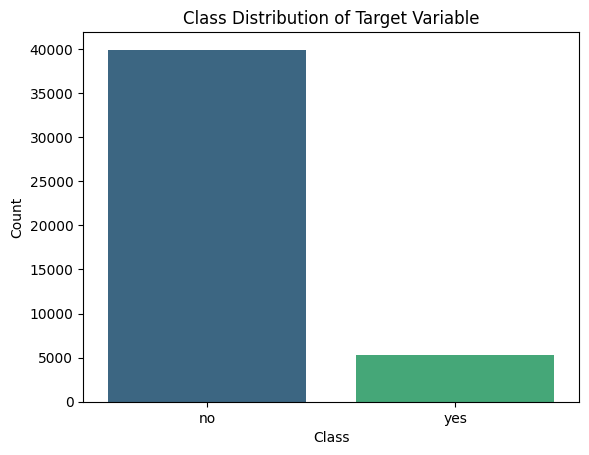

In [14]:
# Plot the count distribution of target variable
sns.countplot(x='y', data=df, hue='y', palette='viridis')
plt.title('Class Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

3. Analyse numerical features

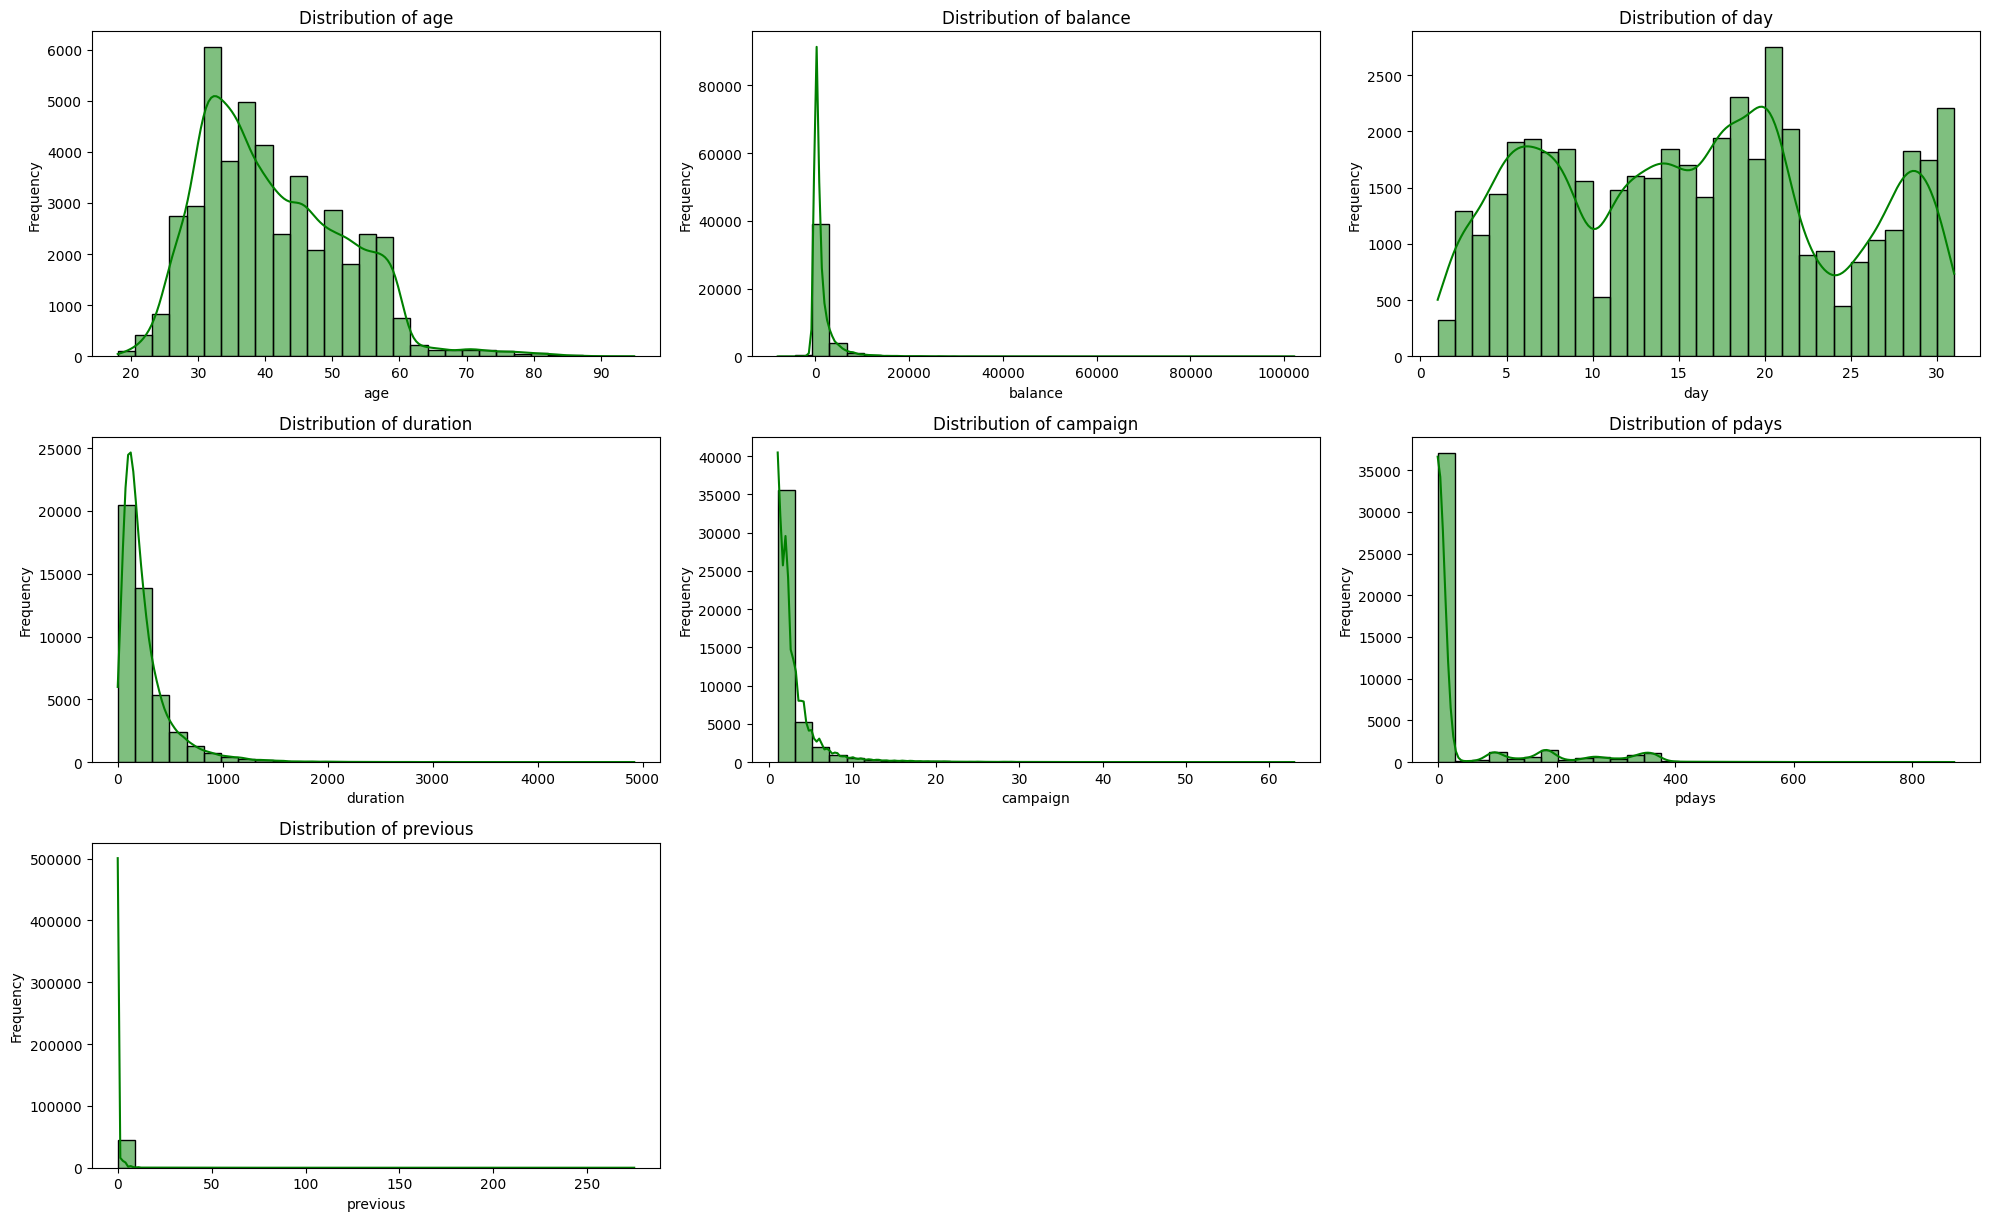

In [15]:
# Create a figure with subplots
plt.figure(figsize=(20, 20))

# Initialize the plot number
plot_number = 1

# Loop through each numerical feature
for column in numerical_features:
    plt.subplot(5, 3, plot_number)

    # Plot the histogram
    sns.histplot(df[column], kde=True, bins=30, color="green")

    # Add title and labels
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

    # Increment the plot number
    plot_number += 1

plt.tight_layout()
plt.show()

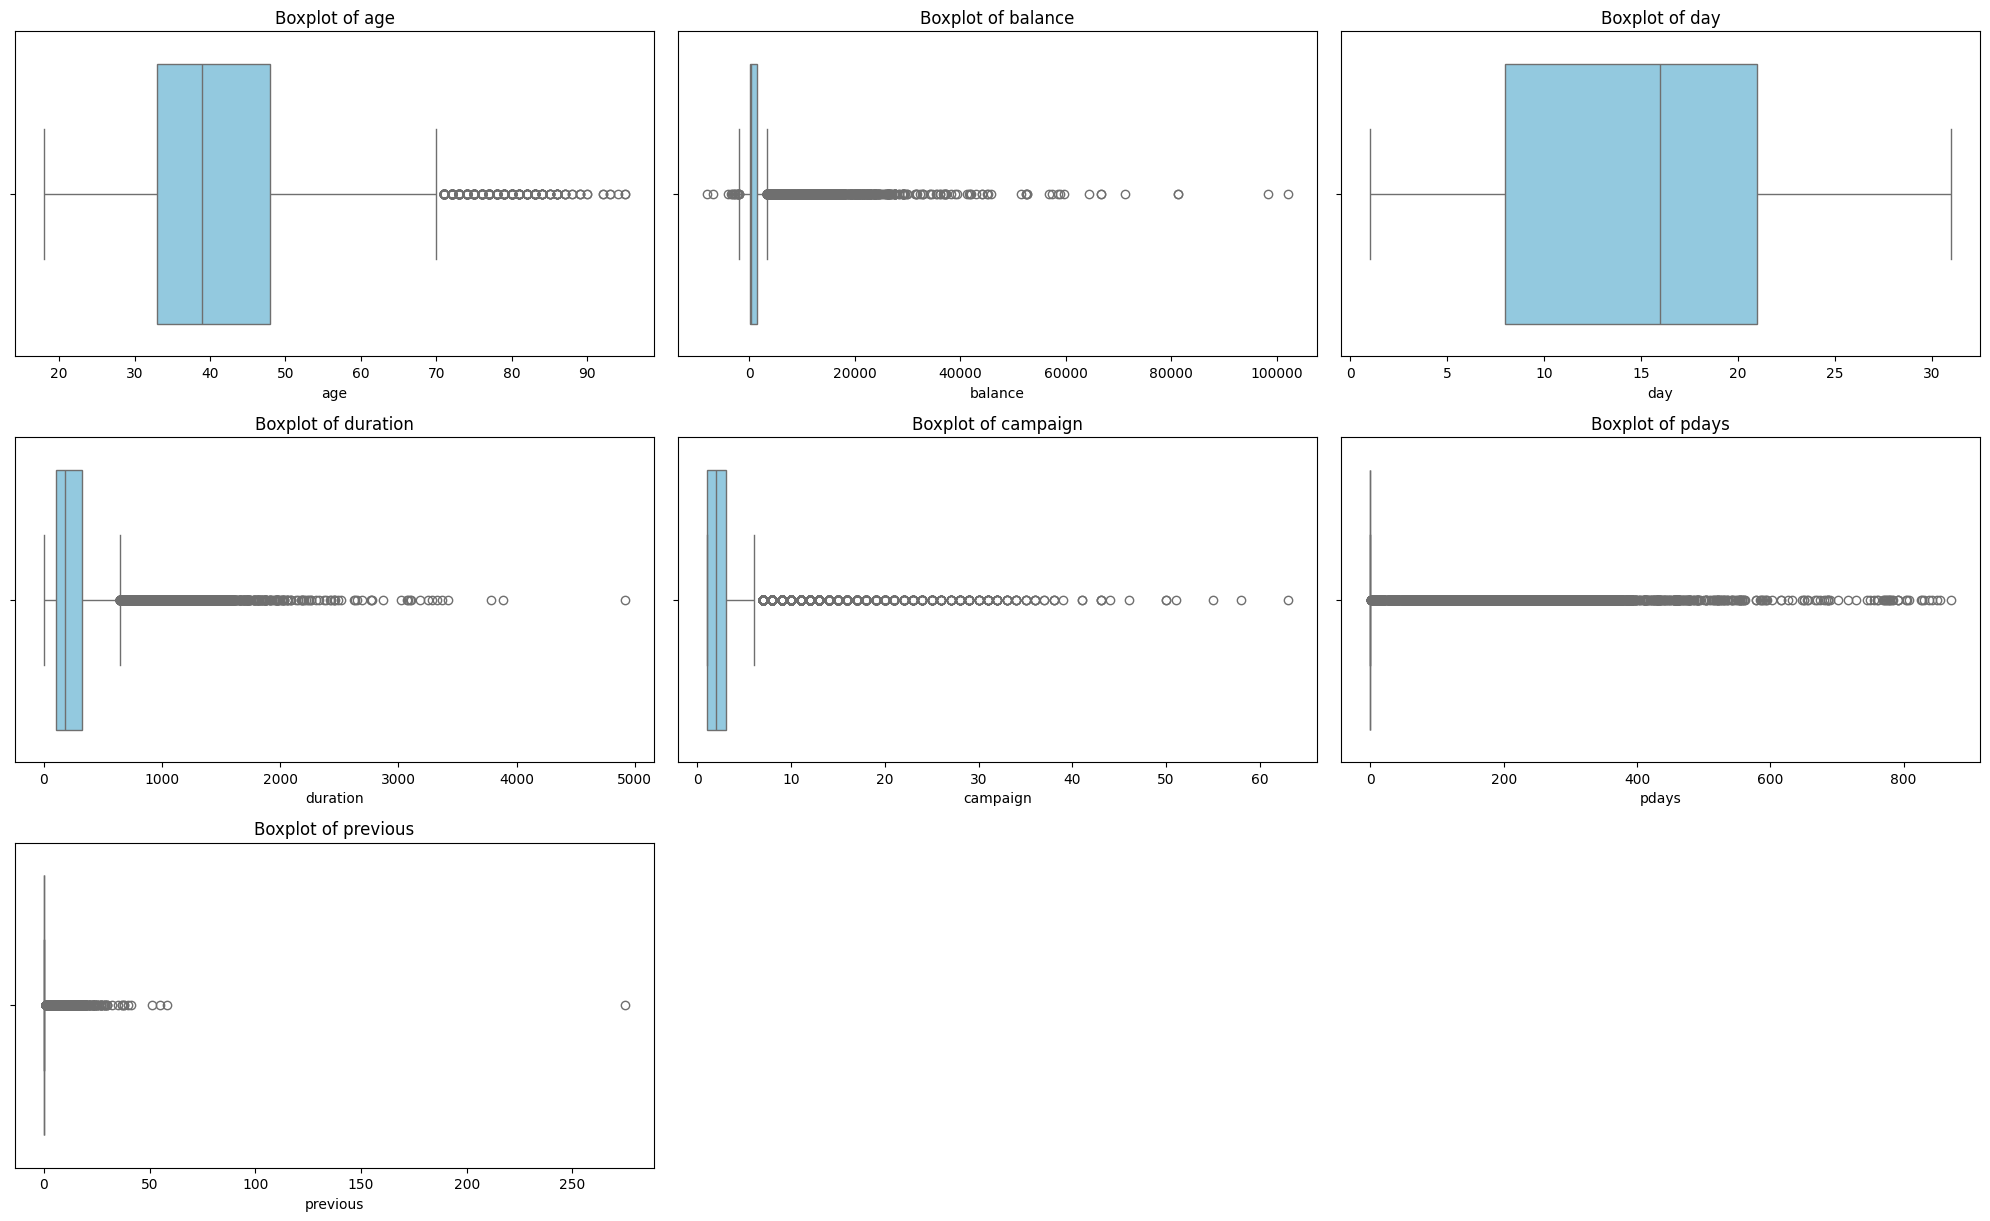

In [16]:
# Create a figure with subplots
plt.figure(figsize=(20, 20))

# Initialize the plot number
plot_number = 1

# Loop through each numerical feature
for column in numerical_features:
    plt.subplot(5, 3, plot_number)

    # Plot boxplot
    sns.boxplot(x=df[column], color="skyblue")

    # Add title and labels
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

    # Increment the plot number
    plot_number += 1

plt.tight_layout()
plt.show()

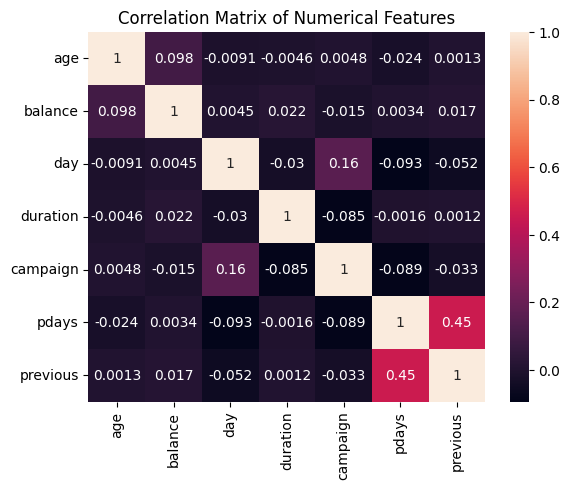

In [17]:
# Compute correlation matrix for numerical features
corr_matrix = df[numerical_features].corr()

# Create a heatmap to visualize correlation matrix
sns.heatmap(corr_matrix, annot=True)

# Display heatmap
plt.title("Correlation Matrix of Numerical Features")
plt.show()

4. Analyse categorical features

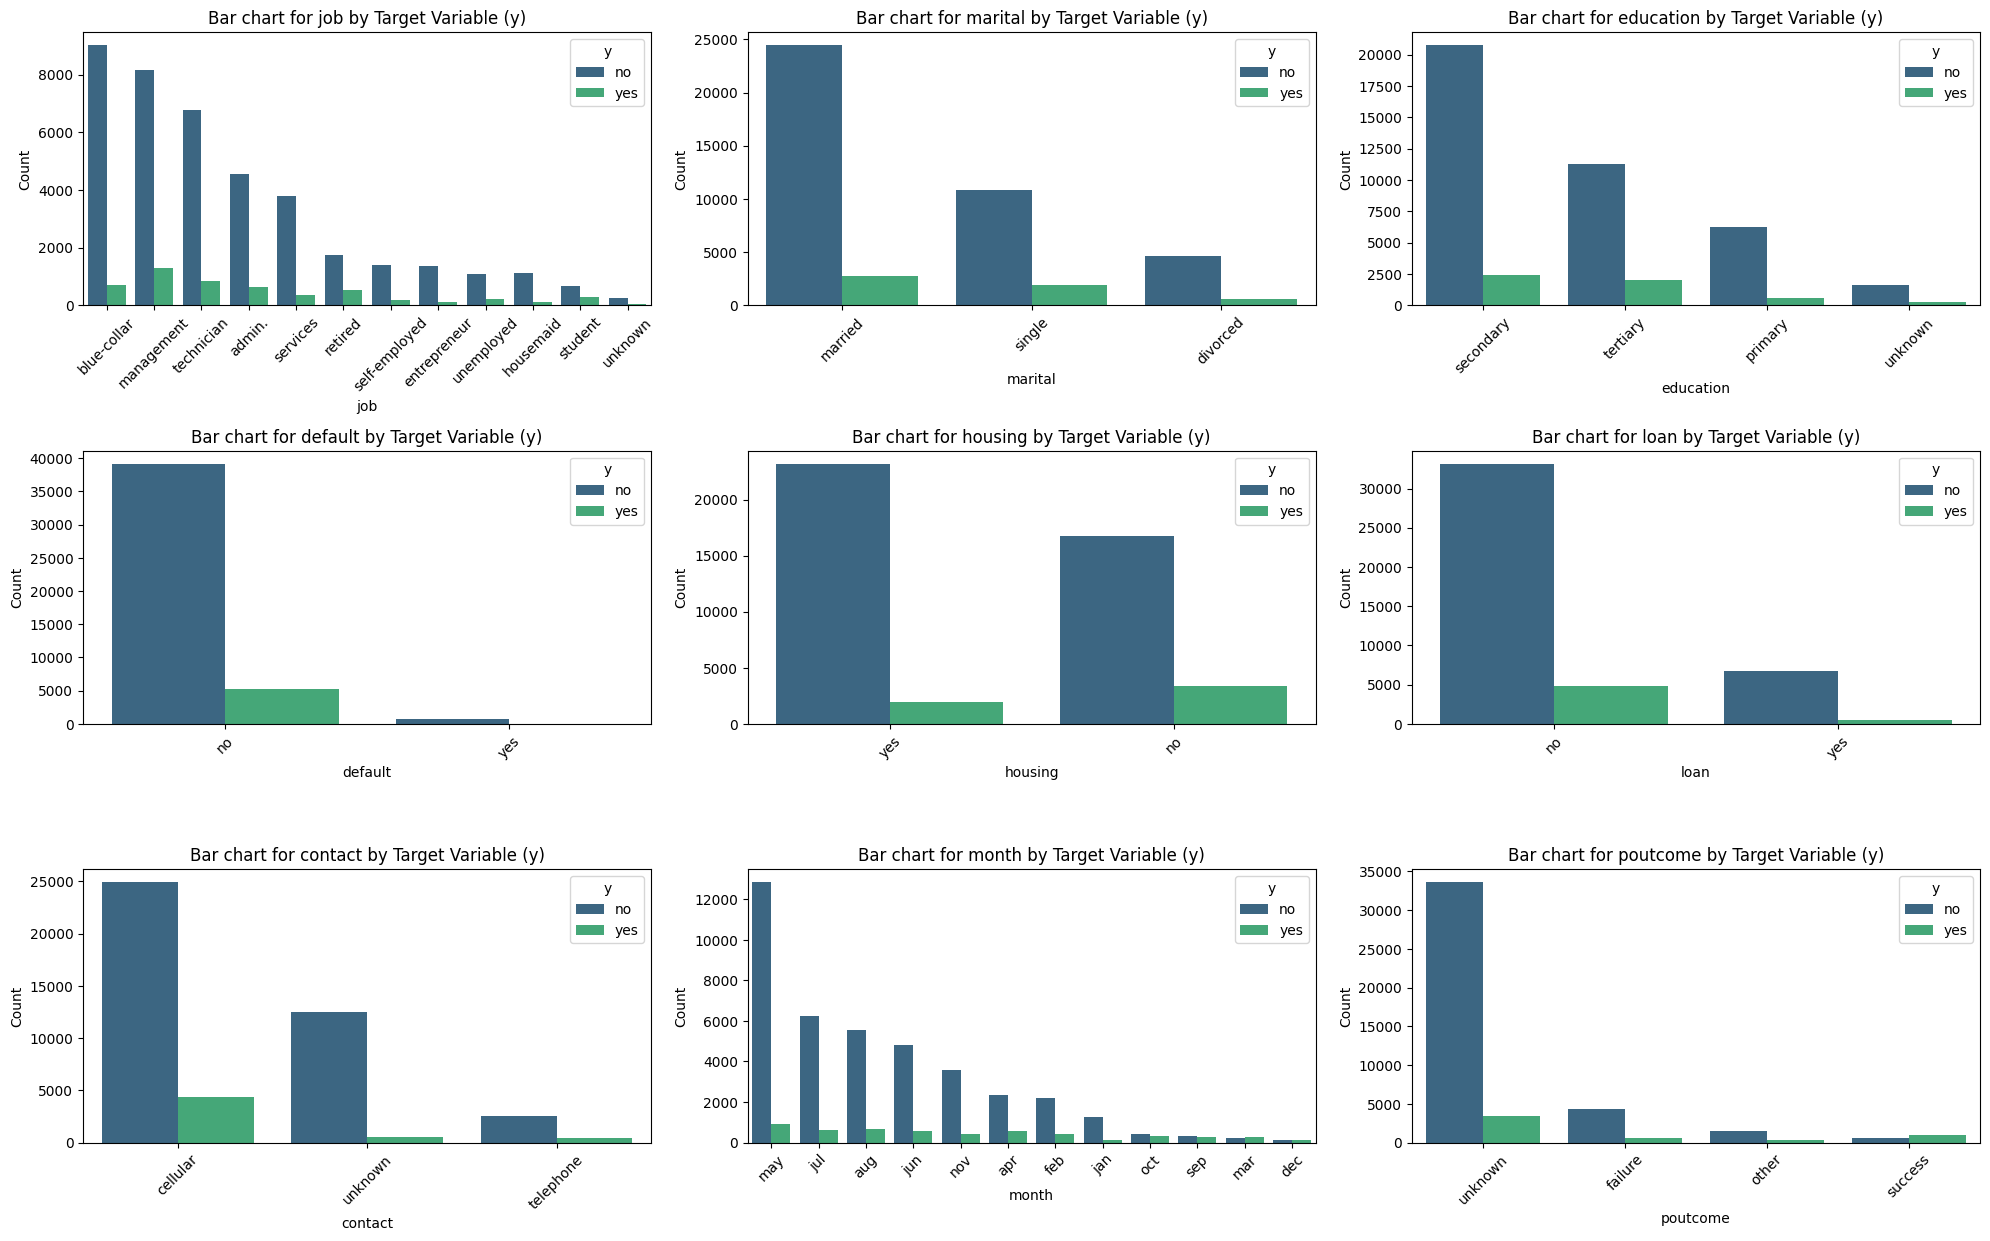

In [18]:
# Create a figure with subplots
plt.figure(figsize=(20, 20))

# Initialize the plot number
plot_number = 1

# Loop through each categorical feature
for column in categorical_features:
    # Add a subplot at the specified position
    plt.subplot(5, 3, plot_number)

    # Plot the countplot with target variable
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, hue='y', palette="viridis")

    # Add title and labels
    plt.title(f"Bar chart for {column} by Target Variable (y)")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    # Increment the plot number
    plot_number += 1

plt.tight_layout()
plt.show()


## Data preprocessing

1. Handling outliers

In [58]:
# Function to count outliers
def count_outliers(df, column):
    # Calculate thresholds
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)

    # Round thresholds to the nearest integer
    lower_bound = round(lower_bound)
    upper_bound = round(upper_bound)

    # Count outliers
    lower_outliers = (df[column] < lower_bound).sum()
    upper_outliers = (df[column] > upper_bound).sum()
    total_outliers = lower_outliers + upper_outliers

    # Print summary
    print(f"Outliers in '{column}': Total = {total_outliers}, Lower = {lower_outliers}, Upper = {upper_outliers}")


In [59]:
# Display number of outliers for each numerical variable
for column in numerical_features:
    count_outliers(df, column)

Outliers in 'age': Total = 738, Lower = 305, Upper = 433
Outliers in 'balance': Total = 902, Lower = 450, Upper = 452
Outliers in 'day': Total = 322, Lower = 322, Upper = 0
Outliers in 'duration': Total = 870, Lower = 418, Upper = 452
Outliers in 'campaign': Total = 451, Lower = 0, Upper = 451
Outliers in 'pdays': Total = 385, Lower = 0, Upper = 385
Outliers in 'previous': Total = 361, Lower = 0, Upper = 361


In [60]:
# Function to handle extreme values
def cap_outliers(df, column):

    # Calculate thresholds
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)

    # Round thresholds to the nearest integer
    lower_bound = round(lower_bound)
    upper_bound = round(upper_bound)

    # Cap the outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    # Print summary
    print(f"Handled outliers in '{column}': Capped values below {lower_bound} and above {upper_bound}.")

    return df


In [61]:
# Capping outliers in numerical variables
for column in numerical_features:
    df = cap_outliers(df, column)

Handled outliers in 'age': Capped values below 23 and above 71.
Handled outliers in 'balance': Capped values below -627 and above 13165.
Handled outliers in 'day': Capped values below 2 and above 31.
Handled outliers in 'duration': Capped values below 11 and above 1269.
Handled outliers in 'campaign': Capped values below 1 and above 16.
Handled outliers in 'pdays': Capped values below -1 and above 370.
Handled outliers in 'previous': Capped values below 0 and above 9.


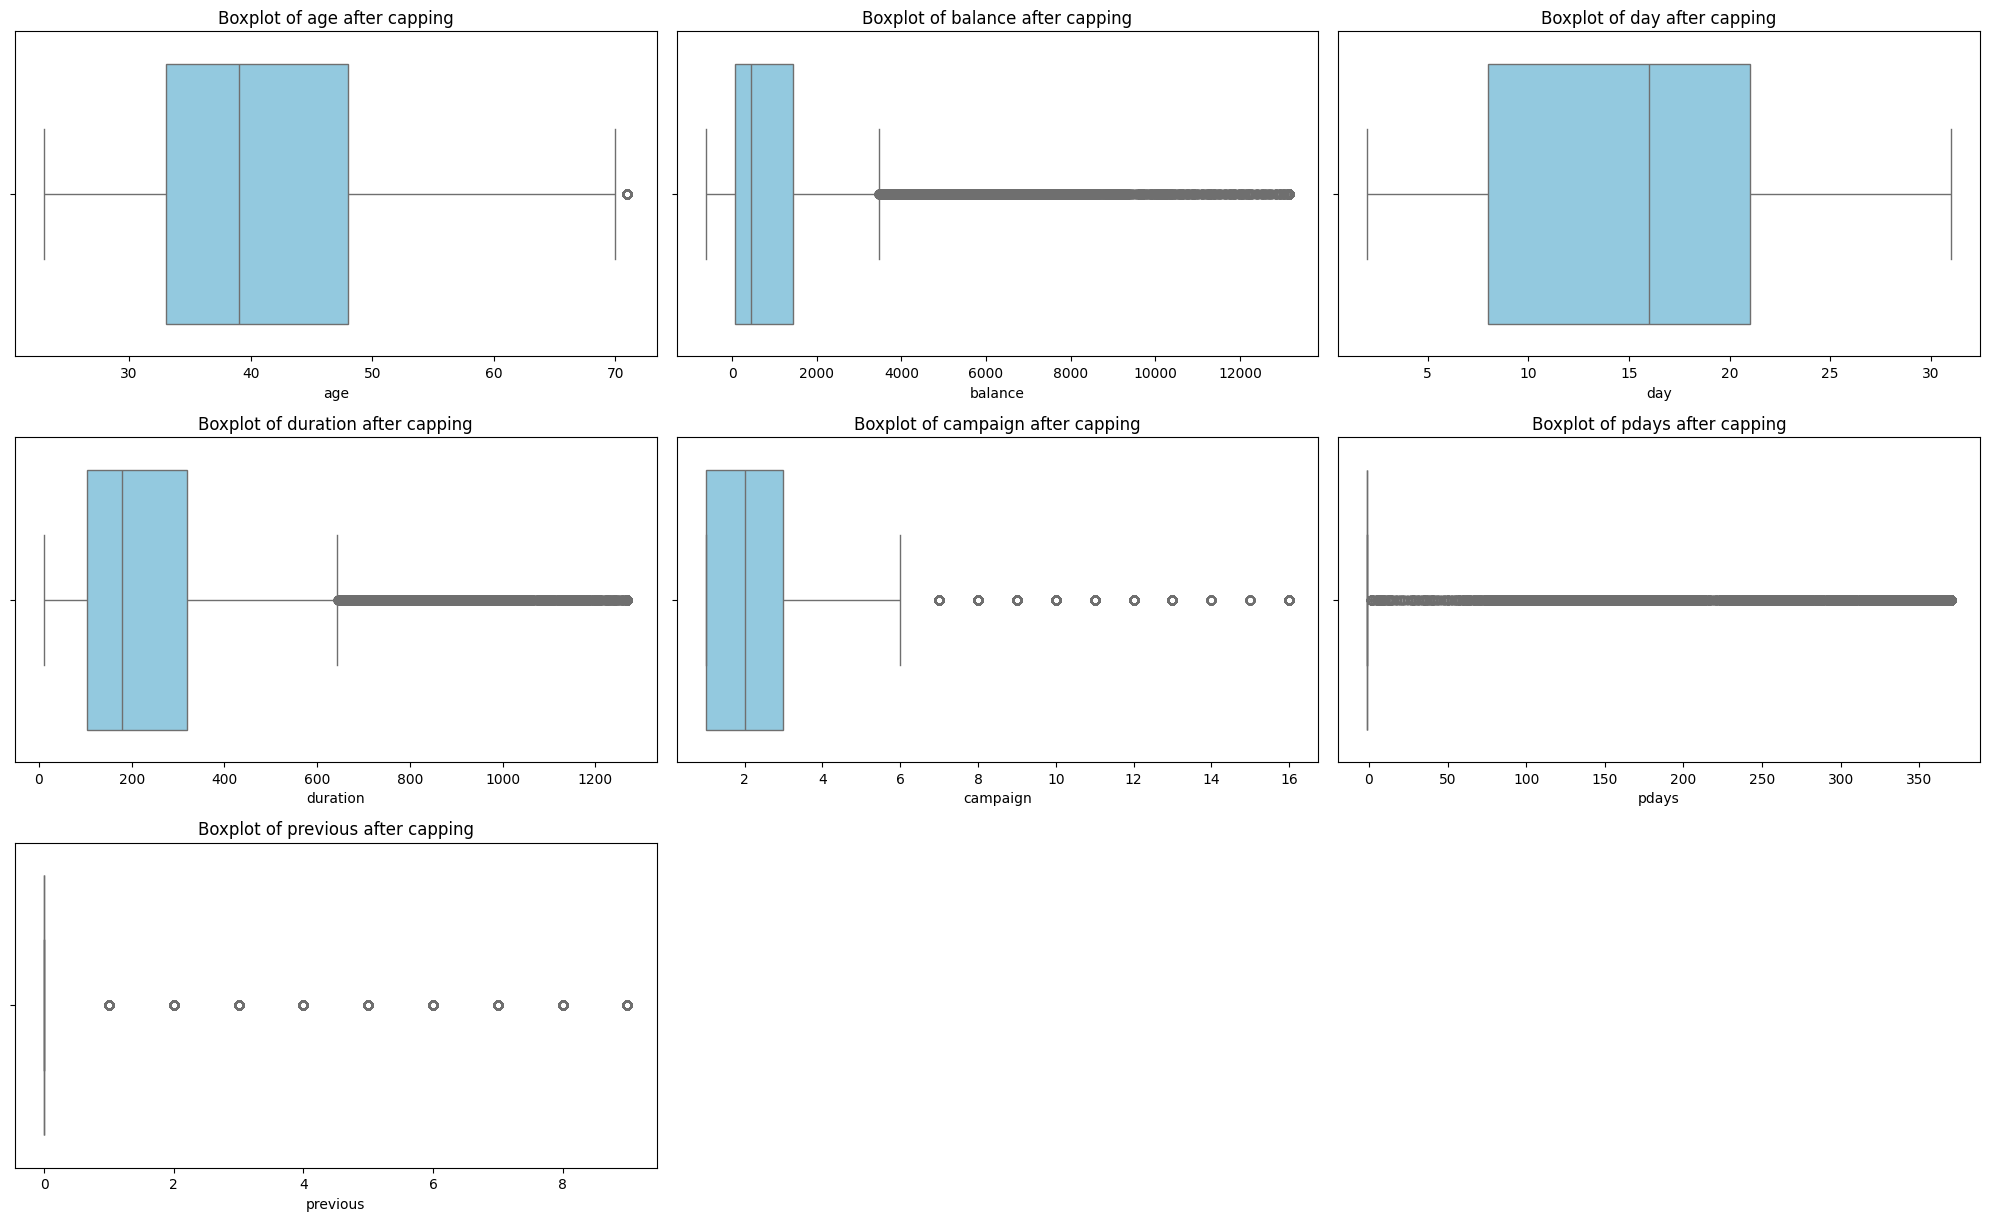

In [62]:
# Create a figure with subplots
plt.figure(figsize=(20, 20))

# Initialize the plot number
plot_number = 1

# Loop through each numerical feature
for column in numerical_features:
    # Add a subplot at the specified position
    plt.subplot(5, 3, plot_number)

    # Plot the boxplot
    sns.boxplot(x=df[column], color="skyblue")

    # Add title and labels
    plt.title(f"Boxplot of {column} after capping")
    plt.xlabel(column)

    # Increment the plot number
    plot_number += 1

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()

In [63]:
# Display number of outliers for each numerical variable after capping
for column in numerical_features:
    count_outliers(df, column)

Outliers in 'age': Total = 0, Lower = 0, Upper = 0
Outliers in 'balance': Total = 0, Lower = 0, Upper = 0
Outliers in 'day': Total = 0, Lower = 0, Upper = 0
Outliers in 'duration': Total = 0, Lower = 0, Upper = 0
Outliers in 'campaign': Total = 0, Lower = 0, Upper = 0
Outliers in 'pdays': Total = 0, Lower = 0, Upper = 0
Outliers in 'previous': Total = 0, Lower = 0, Upper = 0


2. Encode and scale data

In [65]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Split into binary and multi-category features
binary_features = [col for col in categorical_columns if df[col].nunique() == 2]
multi_category_features = [col for col in categorical_columns if df[col].nunique() > 2]

print("Binary features:", binary_features)
print("Multi-category features:", multi_category_features)

Binary features: ['default', 'housing', 'loan', 'y']
Multi-category features: ['job', 'marital', 'education', 'contact', 'month', 'poutcome']


In [66]:
# Create a copy of the original DataFrame for transformations
df2 = df.copy()

In [67]:
# Apply binary encoding
for col in binary_features:
    mapping = {df2[col].unique()[0]: 0, df2[col].unique()[1]: 1}
    df2[col] = df2[col].map(mapping)

    # Display the mapping for each column
    print(f"Binary encoded: {col} -> {mapping}")


Binary encoded: default -> {'no': 0, 'yes': 1}
Binary encoded: housing -> {'yes': 0, 'no': 1}
Binary encoded: loan -> {'no': 0, 'yes': 1}
Binary encoded: y -> {'no': 0, 'yes': 1}


In [68]:
# One-hot encoding for multi-category features
df2 = pd.get_dummies(df2, columns=multi_category_features, drop_first=True)
print("One-hot encoded multi-category features.")


One-hot encoded multi-category features.


In [69]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])
print("Scaled numerical features.")


Scaled numerical features.


In [70]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Display data frame
display(df2.head())

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.647928,0,0.384495,0,0,-1.301248,0.028214,-0.654134,-0.419788,-0.359181,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,0.299720,0,-0.555317,0,0,-1.301248,-0.440316,-0.654134,-0.419788,-0.359181,0,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,-0.759586,0,-0.567320,0,1,-1.301248,-0.759768,-0.654134,-0.419788,-0.359181,0,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
3,0.588622,0,0.101306,0,0,-1.301248,-0.691618,-0.654134,-0.419788,-0.359181,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
4,-0.759586,0,-0.567765,1,0,-1.301248,-0.240126,-0.654134,-0.419788,-0.359181,0,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True


3. Split training and testing data